In [1]:
##Importing The Required Libraries
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

In [2]:
(x_train, y_train), (x_test, y_test)=mnist.load_data ()
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')
number_of_classes = 10  #storing the no of classes in a variable
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

In [3]:
##Adding The CNN Layers
#create model
model=Sequential ()

In [4]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [5]:
#flatten the dimension of the image
model.add(Flatten())

In [6]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

In [7]:
##Compiling The Model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [8]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [9]:
##Train The Model
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 79s 42ms/step - loss: 0.1941 - accuracy: 0.9557 - val_loss: 0.0773 - val_accuracy: 0.9763
Epoch 2/5
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0614 - accuracy: 0.9812 - val_loss: 0.0710 - val_accuracy: 0.9776
Epoch 3/5
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0447 - accuracy: 0.9866 - val_loss: 0.0787 - val_accuracy: 0.9784
Epoch 4/5
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0367 - accuracy: 0.9887 - val_loss: 0.0860 - val_accuracy: 0.9810
Epoch 5/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0285 - accuracy: 0.9916 - val_loss: 0.0820 - val_accuracy: 0.9808


In [10]:
##Observing The Metrics
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.08197209984064102, 0.9807999730110168]


In [11]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 118ms/step
[[1.6846973e-16 2.4640157e-17 1.3057144e-13 4.5306692e-10 6.9653865e-06
  1.7871404e-08 4.1328499e-15 5.2999464e-08 1.5458697e-06 9.9999142e-01]]


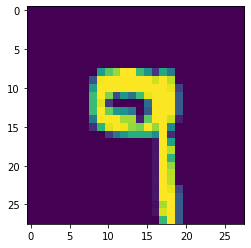

In [12]:
plt.imshow(x_test[6000])

In [13]:
##Testing the Model
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[9]


In [14]:
np.argmax(y_test[6000:6001]) #printing the actual labels

9

In [16]:
##Saving The Model
model.save('models/mnistCNN.h5')